In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
E_ads = -14.80271629
ElStatPot_ref = os.popen("(grep  -A9 '(the norm of the test charge is              1.0000)' OUTCAR_ref) | grep -v 'the norm of the test charge is              1.0000' | tail -n 9  | awk '{ print $2, $4, $6, $8, $10 }' ").read()   # grep the electrostatic potential list from OUTCAR of surface reference system
ElStatPot_ref = ElStatPot_ref.split()
ElStatPot_ref = np.array(ElStatPot_ref, dtype=np.float32)
E_surf = os.popen("grep 'free  energy   TOTEN  =' OUTCAR_ref | tail -n 1 | awk '{ print $5}'").read().strip()
ElStatPot_ref_ads = os.popen("(grep  -A9 '(the norm of the test charge is              1.0000)' OUTCAR_ref_ads) | grep -v 'the norm of the test charge is              1.0000' |tail -n 9  | awk '{ print $2, $4, $6, $8, $10 }' ").read()   # grep the electrostatic potential list from OUTCAR of surface reference system
ElStatPot_ref_ads = ElStatPot_ref_ads.split()
ElStatPot_ref_ads = np.array(ElStatPot_ref_ads, dtype=np.float32)
E_surf_ads = os.popen("grep 'free  energy   TOTEN  =' OUTCAR_ref_ads | tail -n 1 | awk '{ print $5}'").read().strip()


In [3]:
BE_ref = float(E_surf) + E_ads - float(E_surf_ads)
ElStatPot_diff = np.subtract(ElStatPot_ref_ads, ElStatPot_ref) 

a_file = open("ElStatPot_diff.txt", "w")

np.savetxt(a_file, ElStatPot_diff, fmt='%.6f')
a_file.close()

results = []
results2 = []

# Loop to calculate delta_alch and BE_alch
for i in range(9, 18):
    for j in range(18, 27):
        for m in range(27, 36):
            for n in range(36, 45):
                Pd_elstat = ElStatPot_diff[i]
                Ag_elstat = ElStatPot_diff[j]
                Pt_elstat = ElStatPot_diff[m]
                Au_elstat = ElStatPot_diff[n]
                delta_alch = Pd_elstat*1 + Ag_elstat*-1 + Pt_elstat*1 + Au_elstat*-1
                BE_alch = BE_ref + delta_alch
                ii = i - 9
                jj = j - 18
                mm = m - 27
                nn = n - 36
                
                elem1 = 'Pd'
                elem2 = 'Ag'
                elem3 = 'Pd'
                elem4 = 'Ag'
                
                # Prepare the string format with element names and indices
                label = f"{elem1}{ii + 1} {elem2}{jj + 1} {elem3}{mm + 1} {elem4}{nn + 1}"  # Adding 1 to make indices start from 1
                results.append(f"{label} {delta_alch:.8f}")
                results2.append(f"{label} {BE_alch:.8f}")

# Save the results with labels to files
with open("delta_alch_Pd_Ag.txt", "w") as file:
    for line in results:
        file.write(line + "\n")

with open("BE_alch_Pd_Ag.txt", "w") as file2:
    for line in results2:
        file2.write(line + "\n")


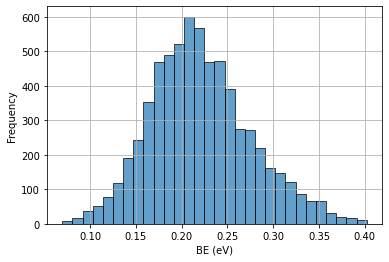

In [5]:
# Load the data from the file
data = np.loadtxt('BE_alch_Pd_Ag.txt', usecols=4)

# Create a histogram
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('BE (eV)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()